<a href="https://colab.research.google.com/github/cambo2018/Advanced-Dynamics/blob/main/5_53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install whit-phys-util

     |████████████████████████████████| 10.9 MB 7.3 MB/s 


In [ ]:
import whit_phys_util as buc
import matplotlib.pyplot as plt
from sympy import *

In [ ]:
repo = buc.local_repository("https://github.com/cambo2018/Advanced-Dynamics")

Cloning repository from GitHub.


In [ ]:
A = 1
B = .1
T = 2
w = 2*pi/T
var('t')

f = Piecewise((A*t+1, t<0), (A*-t+1, t>=0))
f

Piecewise((t + 1, t < 0), (1 - t, True))

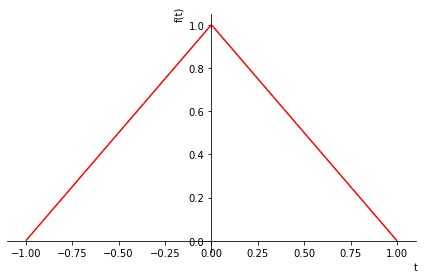

In [ ]:
fig1 = plot(f, (t, -T/2, T/2), line_color="red", label="exact");

In [ ]:
# Forcing Function

var('n', integer=True, positive=True)

f0 = integrate((1/T)*f, (t, -T/2, T/2))

def fn(n):
  return integrate(2/T*cos(n*w*t)*f, (t, -T/2, T/2))

def f_approx(nmax, t):
  f_sym = f0 + Sum(fn(n)*cos(n*w*t), (n, 1, nmax))
  return f_sym.doit()

In [ ]:
# Oscillator

def A(n, w, w_0):
  return fn(n)/sqrt((w_0**2 - (n*w)**2)**2 + (2*B*n*w)**2)

def delta(n, w, w_0):
  return atan2(2*B*n*w, w_0**2 - n**2*w**2)

def x(nmax, t, w, w_0):
  sym_x = a0 + Sum(A(n, w, w_0)*cos(n*w*t-delta(n, w, w_0)), (n, 1, nmax))
  return sym_x.doit()

$\tau_0 = 2$

In [ ]:
T_0 = 2
w_0 = 2*pi/T_0

a0 = f0/w_0**2

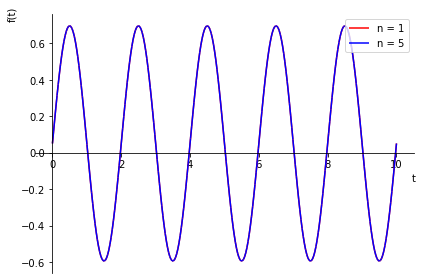

In [ ]:
fig4 = plot(x(1, t, w, w_0), (t, 0, 5*T), line_color = 'red', label='n = 1', show=False, adaptive=False)
fig5 = plot(x(5, t, w, w_0), (t, 0, 5*T), line_color = 'blue', label='n = 5', show = False, adaptive=False)
fig4.legend = True
fig4.extend(fig5)
fig4.show()

$\tau_0 = 3$

In [ ]:
T_0 = 3
w_0 = 2*pi/T_0

a0 = f0/w_0**2

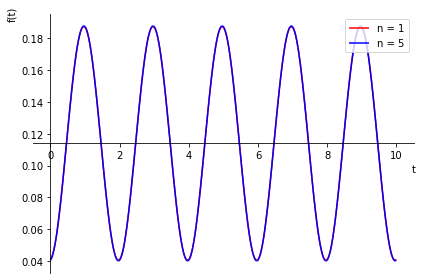

In [ ]:
fig4 = plot(x(1, t, w, w_0), (t, 0, 5*T), line_color = 'red', label='n = 1', show=False, adaptive=False)
fig5 = plot(x(5, t, w, w_0), (t, 0, 5*T), line_color = 'blue', label='n = 5', show = False, adaptive=False)
fig4.legend = True
fig4.extend(fig5)
fig4.show()

In [ ]:
#buc.notebook_to_pdf(repo, author="Cameron Brewer", title="5.53")